In [10]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

Python tiene varias maneras de usar bases de datos, una muy practica es tomarla directamente del link, por lo que procedemos:


In [11]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

df = pd.read_csv(url, names=['sepal length', 'sepal width' , 'petal lenght', 'petal width', 'target'])

In [12]:
#preview
df

,sepal length,sepal width,petal lenght,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [13]:
from sklearn.preprocessing import StandardScaler

features = ['sepal length', 'sepal width', 'petal lenght', 'petal width']

x = df.loc[:, features].values

y = df.loc[:, ['target']].values

x = StandardScaler().fit_transform(x)

Escalamos(centrar y escalar) los datos, lo que hace que nuestros valores se encuentren entre 0-1, es muy importante hacer esto solamente sobre las caracteristicas


In [14]:
pca = PCA(n_components=3)

principalComponents = pca.fit_transform(x)

principalDataframe = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2', 'PC3'])

In [15]:
targetDataframe = df[['target']]

newDataframe = pd.concat([principalDataframe, targetDataframe],axis = 1)

In [16]:
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = ['PC1', 'PC2', 'PC3']

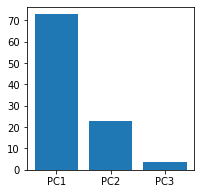

In [27]:
fig = plt.figure(figsize = (3,3))
a = fig.add_subplot(1,1,1) 
a.bar(x= range(1,4), height = percent_variance, tick_label=columns)
a.xlabel = "Principal Component"
#a.ylabel('Percentate of Variance Explained')
#a.xlabel('Principal Component')
#a.title('PCA Scree Plot')
#a.show()

TypeError: 'Text' object is not callable

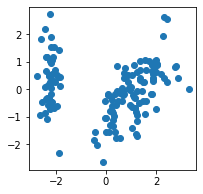

In [21]:
fig = plt.figure(figsize = (3,3))
a2 = fig.add_subplot(1,1,1) 
a2.scatter(principalDataframe.PC1, principalDataframe.PC2)
a2.title('PC1 against PC<2')
a2.xlabel('PC1')
a2.ylabel('PC2')

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

ax.set_title('Plot of PC1 vs PC2', fontsize = 20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

colors = ['r', 'g', 'b']

for target, color in zip(targets,colors):
    indicesToKeep = newDataframe['target'] == target
    ax.scatter(newDataframe.loc[indicesToKeep, 'PC1']
               , newDataframe.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
    
ax.legend(targets)
ax.grid()

In [ ]:
pca.explained_variance_ratio_

In [ ]:
array([0.72770452, 0.23030523])